<a href="https://colab.research.google.com/github/Steve-YJ/Explore-Kaggle/blob/master/01_Classification_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# enter the foldername in your Drive where you have saved the unzipped
# 'cs231n' folder containing the '.py', 'classifiers' and 'datasets'
# folders.
# e.g. 'cs231n/assignments/assignment1/cs231n/'
FOLDERNAME = 'kaggle-DataScience'

assert FOLDERNAME is not None, "[!] Enter the foldername."

%cd drive/My\ Drive
# %cp -r $FOLDERNAME ../../
# %cd ../../
# %cd /Malimg_Exp_200611/
# !bash get_datasets.sh
# %cd ../../

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive
/content/drive/My Drive


In [0]:
with open('/content/drive/My Drive/Malimg_Exp_200611/malimg_data2.pkl', 'rb') as f:
    data = pickle.load(f)

In [0]:
import 

## EDA To Prediction(feat. Die Tanic)

* Reference Kaggle Notebook
    * https://www.kaggle.com/ash316/eda-to-prediction-dietanic
* Data Discription
    * https://www.kaggle.com/c/titanic/data


"Sometimes life has a cruel sense of humor, giving you the thing you always wanted at the worst time possible." - Lisa Kleypas -

## Introduction

The Titanic Dataset is a very good dataset for begineers to start a journey in data science and participate comtetitions in kaggle.

<code>The Objective of this notebook</code> is to give an idea how is the workflow in any predictive modeling problem.
* Objective
    * How do we check features
    * How do we add new features and some Machine Learning Concept

* Addition
    * He also try to keep the notebook as basic as possible so that even newbies can understand every phase of it.


### Contents of the Notebook
* Part1: EDA(Exploratory Data Analysis)
    * Analysis of the Features
    * Finding any relations or trends considering multiple features
* Part2: Feature Engineering and Data Cleaning
    * Add any few features
    * Removing redundant features
    * Converting features into suitable form for modeling

# Part1: EDA(Exploratory Data Analysis)
* Analysis of the Features
* Finding any relations or trends considering multiple features

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')  # 경고 메세지 숨기기
%matplotlib inline

## #1. Load data

<code>pandas.read_csv</code>: Read a comma-separated values(csv) file into DataFrame. also supports optionally iterating or breaking of the file into chunks.

In [9]:
data = pd.read_csv('/content/drive/My Drive/Kaggle-DataScience/Dataset/train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
data.shape

(891, 12)

In [11]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [12]:
# checking for total null values

data.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [13]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [14]:
data.isnull().sum().sum()

866

How many Survived?

In [17]:
data.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [21]:
data.Pclass.value_counts().sort_index()

1    216
2    184
3    491
Name: Pclass, dtype: int64

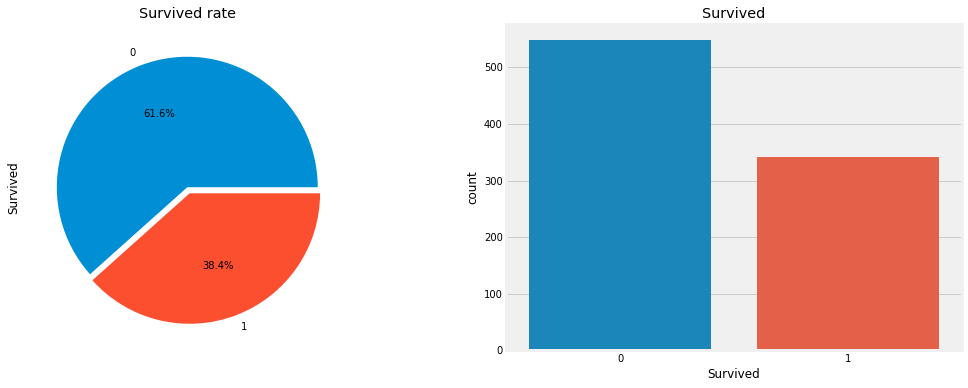

In [66]:
f, ax = plt.subplots(1, 2, figsize=(16, 6))
data.Survived.value_counts().plot.pie(explode=[0, 0.05], autopct='%1.1f%%', ax=ax[0])
ax[0].set_title('Survived rate')
sns.countplot(data.Survived, data=data, ax=ax[1])
ax[1].set_title('Survived')
plt.show()

## Analyzing the Features
* Feature Analysis
    * Categorical Feature
    * Ordinal Feature
    * Continuous Feature

우선 Categorical Feature부터 분석해본다.

### 1) Categorical Feature

In [24]:
data.groupby('Sex')

In [25]:
data.groupby('Sex')['Survived'].count()

Sex
female    314
male      577
Name: Survived, dtype: int64

In [27]:
pd.crosstab(data.Sex, data.Survived, margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


뒤에서 <code>pandas.crosstab</code>에 대해 다룰 것이다

In [28]:
data.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

In [30]:
pd.crosstab(data.Sex, data.Survived, margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


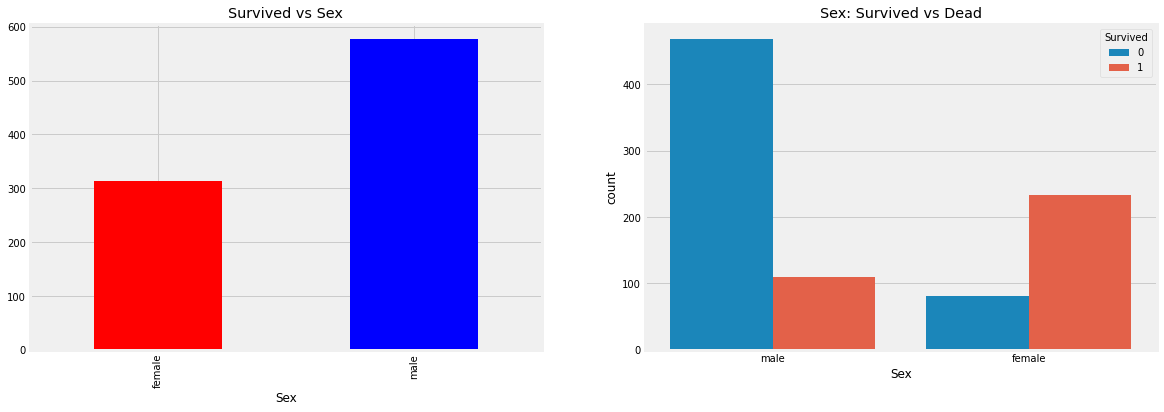

In [35]:
f, ax = plt.subplots(1, 2, figsize = (18, 6))

color = {'red': '#FF0000', 'blue': '#0000FF'}
data.groupby('Sex')['Survived'].count().plot.bar(color=[x for x in color], ax=ax[0])
ax[0].set_title("Survived vs Sex")

sns.countplot('Sex', hue='Survived', data=data, ax=ax[1])
ax[1].set_title('Sex: Survived vs Dead')
plt.show()

### 2) Ordinal Feature

In [36]:
pd.crosstab(data.Pclass, data.Survived, margins=True).style.background_gradient(cmap='summer_r')  # Make Tabulation

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


In [49]:
data.groupby(['Pclass', 'Survived'])['Survived'].count()

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

Text(0.5, 1.0, 'Pclass vs Survived')

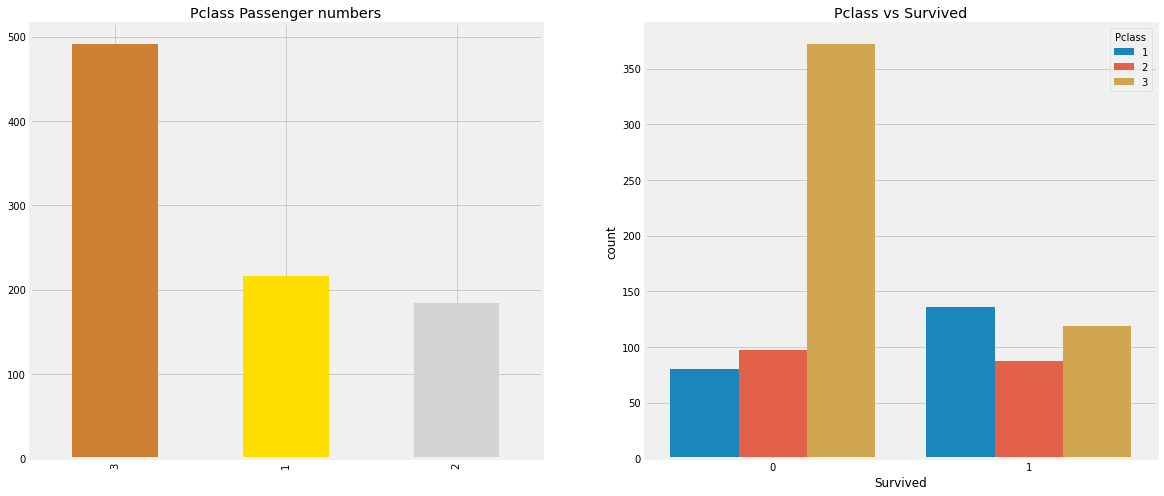

In [64]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
color=['#CD7F32', '#FFDF00', '#D3D3D3']

data['Pclass'].value_counts().plot.bar(color=[x for x in color], ax=ax[0])
ax[0].set_title('Pclass Passenger numbers')
sns.countplot(x='Survived', hue='Pclass', data=data, ax=ax[1])
ax[1].set_title('Pclass vs Survived')

* 해석
    * 1등석 탑승객의 생존자는 사망자보다 많다. 이는 그룹 내에 유일하다.
    * 3등석의 탑승객이 가장 많았으나 가장 많은 사망자 수가 발생하였다.
    * 돈이 모든 것을 살 수 없다고 하지만 Tatanic Data에서는 돈으로 생명을 어느정도 보장받을 수 있었다.

Pclass별 생존율은 어떻게 될까?

In [0]:
# data.groupby(['Pclass', 'Survived'])['Survived'].count()

In [73]:
data[['Pclass', 'Survived']].groupby('Pclass').count()

,Survived
Pclass,
1,216
2,184
3,491


In [77]:
data[['Pclass', 'Survived']].groupby('Pclass').mean()

# Plot으로도 그려보자

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


Text(0.5, 1.0, 'Pclass vs Survived')

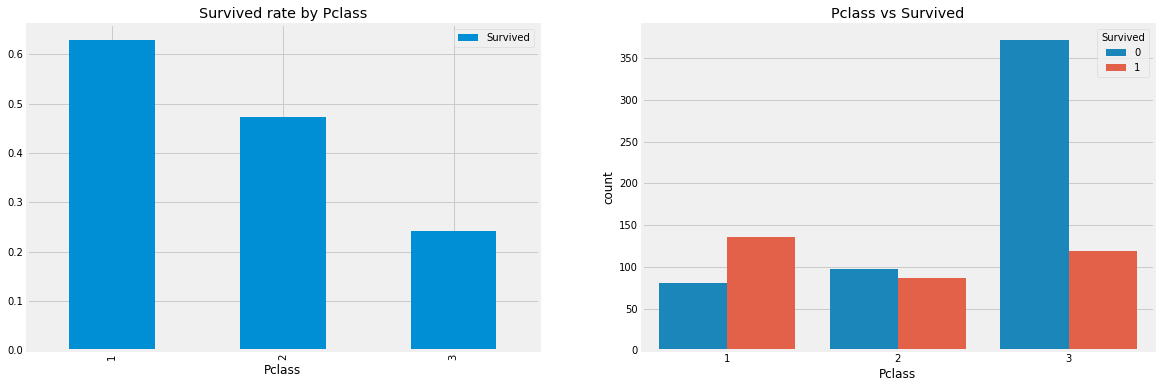

In [81]:
f, ax = plt.subplots(1, 2, figsize = (18, 6))

data[['Pclass', 'Survived']].groupby('Pclass').mean().plot.bar(ax = ax[0])
ax[0].set_title("Survived rate by Pclass")
sns.countplot(x='Pclass', hue='Survived', data=data, ax=ax[1])
ax[1].set_title('Pclass vs Survived')

*Pclass와 Sex에 따른 생존율은 어떻게 될까?*

In [82]:
# pd.crosstab([data.Sex, data.Survived], data.Pclass, margins=True).style.background_gradient(cmap='summer_r')

In [84]:
pd.crosstab([data.Pclass, data.Sex], data.Survived, margins=True).style.background_gradient(cmap='summer_r')

* 해석
    * 1등석과 2등석의 경우 대부분의 여성이 생존했다. 반면 3등석의 경우 절만만이 생존했다.
    * 남성의 경우 1등석에서 상대적으로 많이 생존했다.

그래프로 시각화해보자 

In [0]:
# sns.countplot(x='Pclass', hue='Survived', data=data)

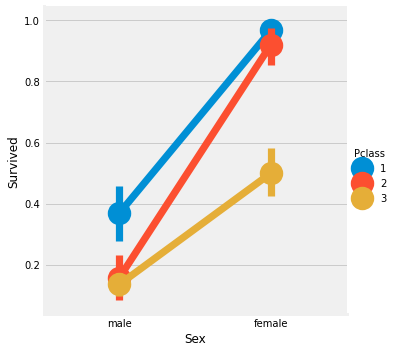

In [91]:
sns.factorplot('Sex', 'Survived', hue='Pclass', data=data)

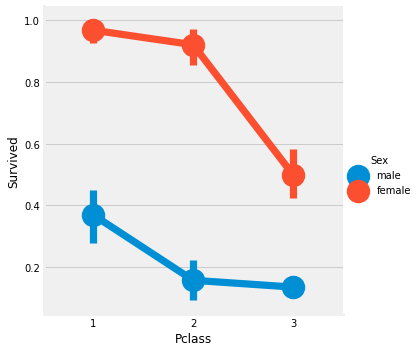

In [90]:
sns.factorplot('Pclass', 'Survived', hue='Sex', data=data)
plt.show()

### 3) Continuous Feature

age feature를 분석해보

In [92]:
print(data.Age.max())
print(data.Age.mean())
print(data.Age.min())

80.0
29.69911764705882
0.42


In [94]:
print('Oldest Passenger was of: ', data['Age'].max(), 'Year')
print('Youngest Passenger was of: ', data['Age'].min(), 'Year')
print('Average Age on the ship: ', data['Age'].mean(), 'Year')

Oldest Passenger was of:  80.0 Year
Youngest Passenger was of:  0.42 Year
Average Age on the ship:  29.69911764705882 Year


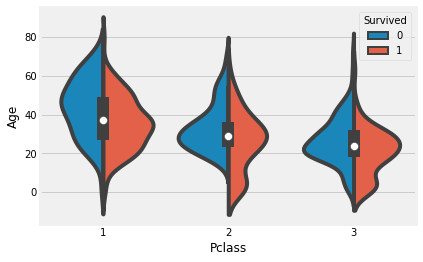

In [95]:
sns.violinplot('Pclass', 'Age', hue='Survived', data=data, split=True)

Text(0.5, 1.0, 'Sex and Age vs Survived')

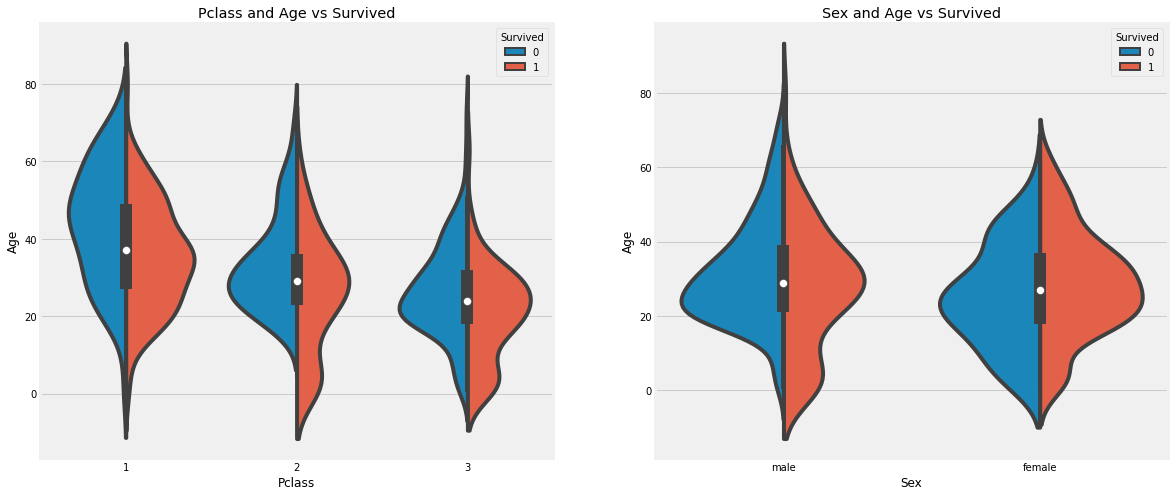

In [101]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
sns.violinplot('Pclass', 'Age', hue='Survived', data=data, split=True, ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
sns.violinplot('Sex', 'Age', hue='Survived', data=data, split=True,  ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')

* 해석
    * Pclass마다 10대 이하의 어린이들의 생존률은 높다.
    * Pclass 1의 경우 20~50 여성의 생존률이 높다.
    * 남성의 경우 60세 이상으로 갈수록 사망율이 높아진다.

## Pre-Processing
* Preprocessing Null Values

In [102]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Age Feature의 경우 177개의 null값을 가지고 있다. 심플한 방법으로는 Age의 평균 값을 Null값으로 입력해 주는 방법이있다. 하지만 이 방법은 문제가 있다. 만약 4세의 값에 평균값인 29를 넣어준다면 아주 큰 오차가 발생하게 되는 것이다.

이 노트북에서 제안하는 방법은 Name Feature를 이용하는 것이다.

In [103]:
# 우선 Age의 평균값을 구해보자.

data.Age.mean()

29.69911764705882

In [105]:
# 이제 Name column을 살펴보자

data.Name[:5]

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

Name column의 값을들 살펴보면 이름에서 호칭을 발견할 수 있다. e.g) Mr, Ms, Miss ...

본 노트북에서는 호칭을 통해 나이른 추론하려고 한다. 

### Fill the Null Values
앞에서 얻은 Insight를 바탕으로 Name에 있는 '호칭'을 통해 나이를 추론하려고 한다.<br>
Pandas DataFrame에 'Initial'라는 Feature를 추가로 생성해준다.


In [106]:
data['initial'] = 0
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,initial
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [107]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'initial'],
      dtype='object')

In [108]:
data.shape

(891, 13)

'initial'라는 새로운 column이 생성된 것을 볼 수 있다.

In [0]:
for i in data:
    data['initial'] = data.Name.str.extract('([A-Za-z]+)\.') # lets extract the Salutations


[A-Za-z]+<br>

what it does it?


It looks for strings which lie between A-Z or a-z and followed by a .(dot)
So we successfuly extract the Initials from the Name